In [234]:
#importações das bibliotecas utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import display
import seaborn as sb

%matplotlib inline

In [196]:
#composição do time em perfis
#energia do time X pressão que a pessoa sente (energia baixa, confere o estresse aplicado nela)
#colaboradores que bateram meta por perfil de time
#correlação por gênero/escolaridade em determinado cargo
#colaboradores por idade(correlaçao), ver se faz sentido o preço de um profissional mais velho ou mais novo

In [197]:
#Leitura e abertuda do conjunto de dados

df = pd.read_csv('caseanalytics.csv', delimiter=',');

In [198]:
#exibição da tabela

df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52.0,17.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2006.0,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53.0,18.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2007.0,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54.0,19.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2008.0,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55.0,20.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2009.0,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56.0,21.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2010.0,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21.0,2.0,Valemount,Dairy,Dairy Person,34.0,M,Male,Layoff,Involuntary,2015.0,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19.0,0.0,Vancouver,Customer Service,Cashier,44.0,F,Female,Resignaton,Voluntary,2013.0,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21.0,2.0,White Rock,Customer Service,Cashier,39.0,F,Female,Layoff,Involuntary,2015.0,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19.0,0.0,Kelowna,Customer Service,Cashier,16.0,F,Female,Resignaton,Voluntary,2013.0,TERMINATED,STORES


In [199]:
#Interpretando os atributos

#1 - EmployeeID: Identificação do funcionário. Número ID
#2 - recorddate_key: checkpoint, dados que correspondem até aquela data
#3 - birthdate_key: Informa a data de aniversário do funcionário
#4 - orighiredate_key: Informa a data da primeira contratação daquele funcionári (data original de contratação).
#5 - terminationdate_key:
#6 - Idade atual do funcionário.
#7 - length_of_service: tempo de serviço total no ano atual.
#8 - city_name: Cidade de atuação do funcionário.
#9 - departament_name: Nome do departamento de atuação do funcionário.
#10 - job_title: Nome do cargo exercido pelo funcionário.
#11 - store_name: Número correspondente a uma determinada loja (Funcionarios de cargos diferentes podem ter o mesmo store_name por trabalharem na mesma loja)
#12 - gender_short: Gênero do funcionário de forma abreviada (M ou F)
#13 - gender_full: Nome completo do Gênero do funcionário (male ou female)
#14 - termreason_desc: Motivo da demissão
#15 - termtype_desc: Tipo de demissão (voluntaria ou involuntaria)
#16 - STATUS_YEAR: Ano atual de atualização
#17 - STATUS: informa se o funcionário trabalha ou não atualmente na empresa
#18 - BUSINESS_UNIT: Unidade Comercial, se é um escritorio ou uma loja

In [200]:
#Limpeza de Dados 
#Verificação se há dados faltantes

df.isnull().sum()

EmployeeID               0
recorddate_key         115
birthdate_key          115
orighiredate_key       115
terminationdate_key    115
age                    115
length_of_service      115
city_name              115
department_name        115
job_title              115
store_name             115
gender_short           115
gender_full            115
termreason_desc        115
termtype_desc          115
STATUS_YEAR            115
STATUS                 115
BUSINESS_UNIT          115
dtype: int64

In [201]:
#Revendo instancias com dados faltantes

df.dropna(inplace=True)
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52.0,17.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2006.0,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53.0,18.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2007.0,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54.0,19.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2008.0,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55.0,20.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2009.0,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56.0,21.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2010.0,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21.0,2.0,Valemount,Dairy,Dairy Person,34.0,M,Male,Layoff,Involuntary,2015.0,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19.0,0.0,Vancouver,Customer Service,Cashier,44.0,F,Female,Resignaton,Voluntary,2013.0,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21.0,2.0,White Rock,Customer Service,Cashier,39.0,F,Female,Layoff,Involuntary,2015.0,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19.0,0.0,Kelowna,Customer Service,Cashier,16.0,F,Female,Resignaton,Voluntary,2013.0,TERMINATED,STORES


In [ ]:
df['termreason_desc'].value_counts()

In [202]:
df.isnull().sum()

#Como diminuiu exatamente 115 linhas, é extremamente provável que havia 115 linhas com TODOS os dados faltantes na base de dados.

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [203]:
df.drop_duplicates()

#Não há linhas com dados duplicados

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52.0,17.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2006.0,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53.0,18.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2007.0,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54.0,19.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2008.0,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55.0,20.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2009.0,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56.0,21.0,Vancouver,Executive,CEO,35.0,M,Male,Not Applicable,Not Applicable,2010.0,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21.0,2.0,Valemount,Dairy,Dairy Person,34.0,M,Male,Layoff,Involuntary,2015.0,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19.0,0.0,Vancouver,Customer Service,Cashier,44.0,F,Female,Resignaton,Voluntary,2013.0,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21.0,2.0,White Rock,Customer Service,Cashier,39.0,F,Female,Layoff,Involuntary,2015.0,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19.0,0.0,Kelowna,Customer Service,Cashier,16.0,F,Female,Resignaton,Voluntary,2013.0,TERMINATED,STORES


In [216]:
df["BUSINESS_UNIT"].value_counts()

STORES        49068
HEADOFFICE      470
Name: BUSINESS_UNIT, dtype: int64

In [205]:
#df.city_name = pd.Categorical(pd.factorize(df.city_name)[0])
#df.department_name = pd.Categorical(pd.factorize(df.department_name)[0])
#df.job_title = pd.Categorical(pd.factorize(df.job_title)[0])
#df.gender_short = pd.Categorical(pd.factorize(df.gender_short)[0])
#df.gender_full = pd.Categorical(pd.factorize(df.gender_full)[0])
#df.termreason_desc = pd.Categorical(pd.factorize(df.termreason_desc)[0])
#df.termtype_desc = pd.Categorical(pd.factorize(df.termtype_desc)[0])
#df.STATUS = pd.Categorical(pd.factorize(df.STATUS)[0])
#df.BUSINESS_UNIT = pd.Categorical(pd.factorize(df.BUSINESS_UNIT)[0])


In [206]:
#Checar as demissões

df['termtype_desc'].replace(['Not Applicable', 'Voluntary', 'Involuntary'], [0, 1, 2], inplace = True)

df

Not Applicable    48063
Retirement          875
Resignaton          385
Layoff              215
Name: termreason_desc, dtype: int64

In [218]:
df.termtype_desc.value_counts()

0    48063
1     1260
2      215
Name: termtype_desc, dtype: int64

In [208]:
totalComDescricao = 1260+215 #numero total de demissoes com descrição

taxaDemissao = 1260/totalComDescricao

taxaDemissao

#Mais de 85% das demissões descritas são de origem voluntária, ou seja, a pedido do funcionário.

0.8542372881355932

In [219]:
#Porém, ao checar os motivos, a grande maioria dos voluntários saiu devido à aposentadoria e uma pequena parte pediu demissão por outros motivos ou foi demimitido
#Das 1260 saídas, 875 foram por causa da aposentadoria, o que representa quase 70%
#Dessa forma, baixo indice
df['termreason_desc'].value_counts()

Not Applicable    48063
Retirement          875
Resignaton          385
Layoff              215
Name: termreason_desc, dtype: int64

In [209]:
df.describe()

,age,length_of_service,store_name,termtype_desc,STATUS_YEAR
count,49538.000000,49538.000000,49538.000000,49538.000000,49538.000000
mean,42.045521,10.410776,27.279725,0.034115,2010.614538
std,12.420833,6.311900,13.524709,0.204040,2.845514
min,19.000000,0.000000,1.000000,0.000000,2006.000000
25%,31.000000,5.000000,16.000000,0.000000,2008.000000
50%,42.000000,10.000000,28.000000,0.000000,2011.000000
75%,53.000000,15.000000,42.000000,0.000000,2013.000000
max,65.000000,26.000000,46.000000,2.000000,2015.000000


In [210]:
df['department_name'].value_counts()


Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Recruitment                  62
Executive                    60
HR Technology                55
Accounting                   50
Employee Records             35
Labor Relations              30
Accounts Receiveable         30
Training                     26
Accounts Payable             25
Information Technology       20
Audit                        20
Compensation                 20
Investment                   20
Legal                        17
Name: department_name, dtype: int64

In [211]:


df['gender_full'].replace(['Male', 'Female'], [0, 1], inplace = True)

genero_overview = df.groupby('gender_full')

genero_overview.describe()

age                                                      \
               count       mean        std   min   25%   50%   75%   max   
gender_full                                                                
0            23715.0  40.854818  11.743888  19.0  31.0  41.0  51.0  64.0   
1            25823.0  43.139023  12.915415  19.0  32.0  43.0  54.0  65.0   

            length_of_service             ... termtype_desc      STATUS_YEAR  \
                        count       mean  ...           75%  max       count   
gender_full                               ...                                  
0                     23715.0  10.109298  ...           0.0  2.0     23715.0   
1                     25823.0  10.687643  ...           0.0  2.0     25823.0   

                                                                            
                    mean       std     min     25%     50%     75%     max  
gender_full                                                                 
0            2010.674046  2.849552  2006.0  2008.0  2011.0  2013.0  2015.0  
1            2010.559888  2.840758  2006.0  2008.0  2011.0  2013.0  2015.0  

[2 rows x 40 columns]

In [212]:
print(genero_overview.describe())

                 age                                                      \
               count       mean        std   min   25%   50%   75%   max   
gender_full                                                                
0            23715.0  40.854818  11.743888  19.0  31.0  41.0  51.0  64.0   
1            25823.0  43.139023  12.915415  19.0  32.0  43.0  54.0  65.0   

            length_of_service             ... termtype_desc      STATUS_YEAR  \
                        count       mean  ...           75%  max       count   
gender_full                               ...                                  
0                     23715.0  10.109298  ...           0.0  2.0     23715.0   
1                     25823.0  10.687643  ...           0.0  2.0     25823.0   

                                                                            
                    mean       std     min     25%     50%     75%     max  
gender_full                                                     

In [220]:
df['STATUS'].replace(['ACTIVE', 'TERMINATED'], [0, 1], inplace = True)



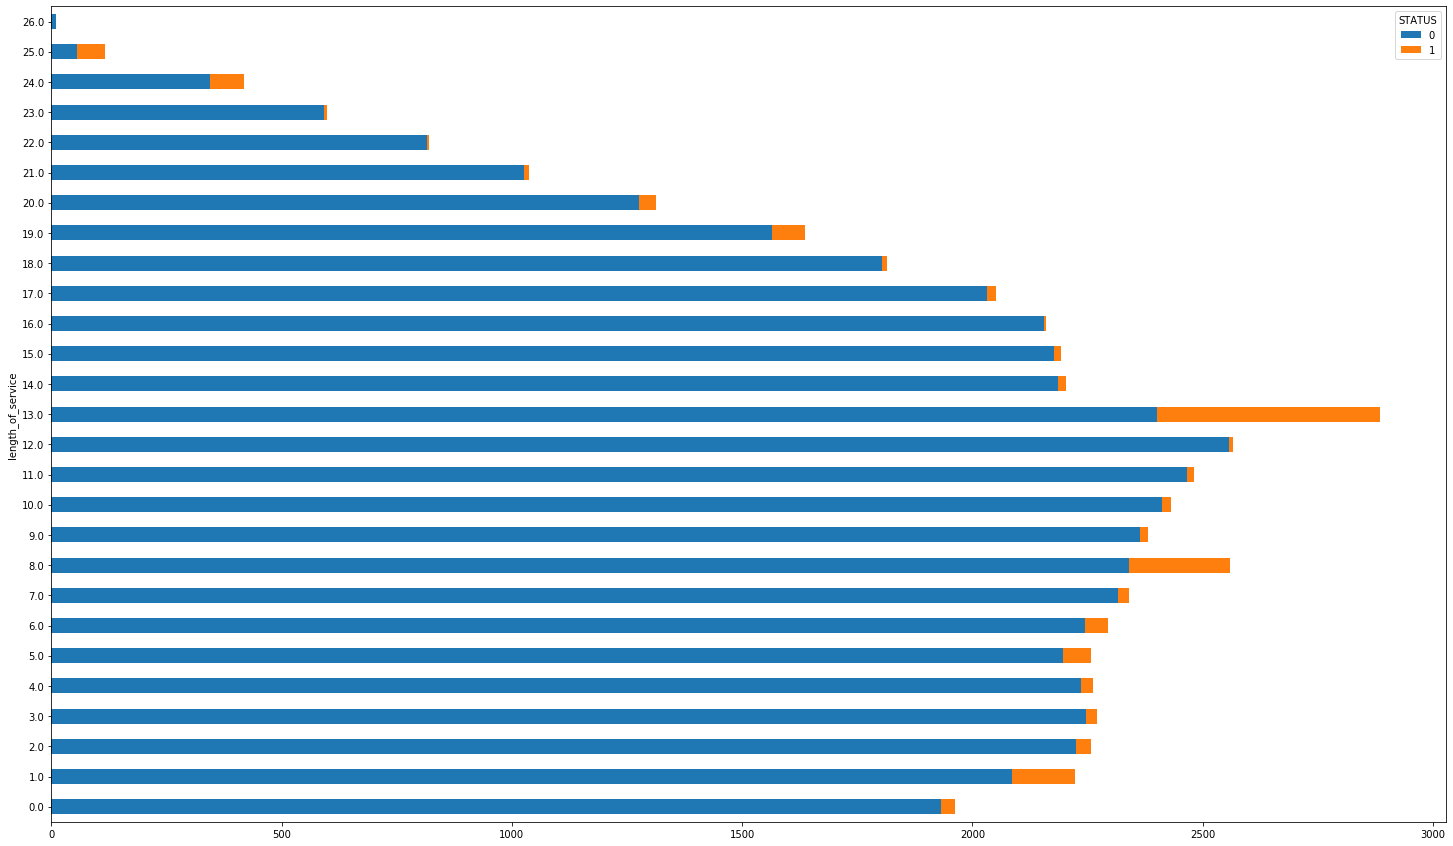

In [225]:
#Tempo de Empresa VS Demissão

tbl_tempo_demissao = pd.crosstab(index=df['length_of_service'], columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

#Curva de Risco
#A maior incidência de demissões ocorreu aos 8 e aos 13 anos de serviço acumulado. Portanto, é bom dar uma valorizada aos profissionais
#com essa faixa de tempo de serviço. Talvez dar alguns benefícios ou um dia atípico para desestressar.
#Após os 13 anos de empresa, a taxa de abandono diminui consideravelmente. Dessa forma, os funcionários tendem a permanecer no trabalho,
#sendo possivelmente os poucos abandonos ligados à aposentadoria. Politicas para reter talentos

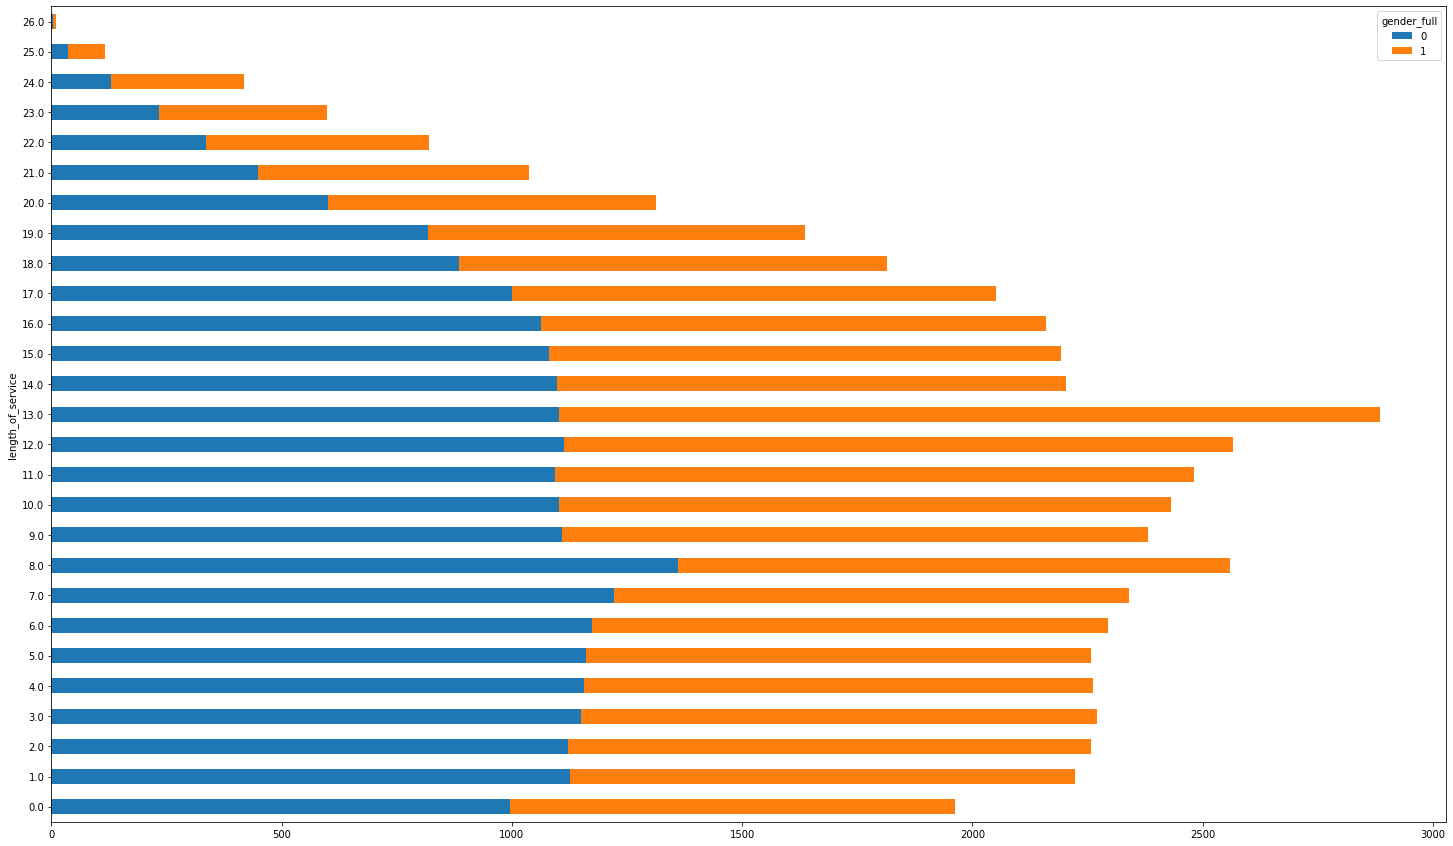

In [226]:
tbl_tempo_genero = pd.crosstab(index=df['length_of_service'], columns=df['gender_full'])
tbl_tempo_genero.plot(kind="barh",figsize=(25,15), stacked=True)

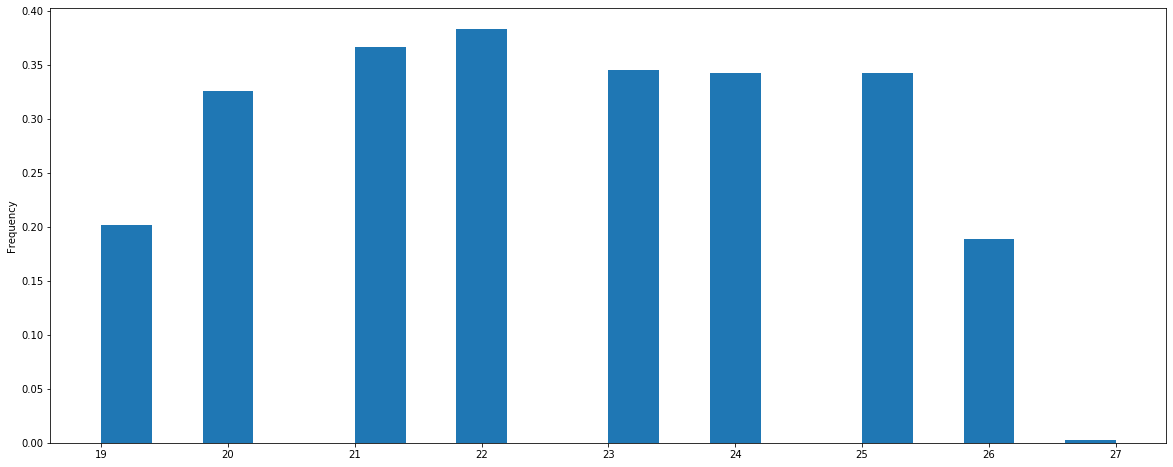

In [343]:
df.loc[(df['length_of_service'] == 0.0), 'age'].plot(kind='hist', density=1, bins=20, stacked=False,alpha=1,figsize=(20,8))

#Há uma característica de contratação de pessoas bem jovens, de 19 a 26 anos

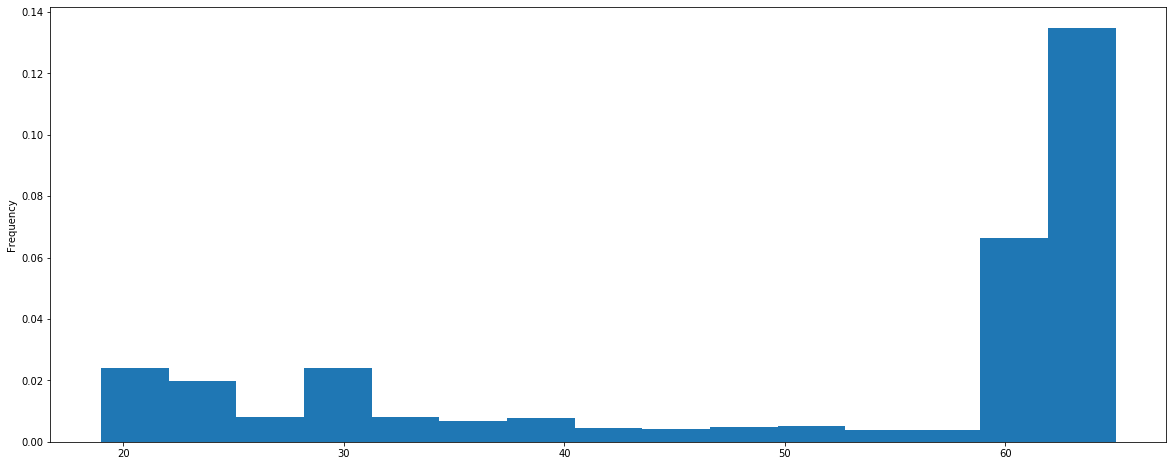

In [229]:
df.loc[(df['STATUS'] == 1), 'age'].plot(kind='hist', density=1, bins=15, stacked=False,alpha=1,figsize=(20,8))

#Confirma que a grande maioria dos desligamentos ocorre por aposentadoria (mais de 60 anos de idade). Dessa forma, é possivel que pela grande maioria
#dos desligamentos ocorrer por aposentadoria, haja uma grande satisfação com o trabalho.
#Por outro lado, há um pico menor, mas ainda considerável de pessoas entre 20-25 anos e aos 30 anos.
#Pessoas com mais de 30 anos costumam permanecer na empresa

In [339]:
corr = df.corr() #funcao agredada que retorna o coeficiente de correlação 
corr.style.background_gradient(cmap='coolwarm') #mapa de correlação

#Alta correlação positiva entre Idade e o tempo de serviço
#Alta correlação positiva entre o Status e o tipo de demissão (devido ao active/not avaialabe)
#Correlação negativa entre o nome do departamento X idade e nome departamento X tempo de serviço
#As pessoas mais velhas estão concentradas nas funções de escritório e cargos mais importantes como CEO.
#Quanto mais tempo o funcionário fica na Rede, mais ele evolui no trabalho.
#Os jovens estão concentrados nos trabalhos de campo (lojas).


,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,termtype_desc,STATUS_YEAR,STATUS
age,1,0.909716,-0.0295993,-0.557551,-0.250277,-0.00552485,0.0918682,0.107588,-0.0393649,0.131707
length_of_service,0.909716,1,-0.036195,-0.497509,-0.257348,0.00961214,0.0457728,0.0256402,0.238227,0.0245578
city_name,-0.0295993,-0.036195,1,-0.0463125,-0.0596075,-0.472628,-0.0100928,0.0758202,0.00317929,0.0430669
department_name,-0.557551,-0.497509,-0.0463125,1,0.376239,0.0483854,-0.0478558,-0.00159489,0.13618,-0.0108631
job_title,-0.250277,-0.257348,-0.0596075,0.376239,1,0.079803,-0.0122989,-0.0136342,0.0762145,-0.0145054
store_name,-0.00552485,0.00961214,-0.472628,0.0483854,0.079803,1,0.00255962,-0.0297344,0.0090559,-0.0224862
gender_full,0.0918682,0.0457728,-0.0100928,-0.0478558,-0.0122989,0.00255962,1,0.0281314,-0.0200412,0.0335507
termtype_desc,0.107588,0.0256402,0.0758202,-0.00159489,-0.0136342,-0.0297344,0.0281314,1,0.0310986,0.954435
STATUS_YEAR,-0.0393649,0.238227,0.00317929,0.13618,0.0762145,0.0090559,-0.0200412,0.0310986,1,0.00390493
STATUS,0.131707,0.0245578,0.0430669,-0.0108631,-0.0145054,-0.0224862,0.0335507,0.954435,0.00390493,1


In [240]:
df['department_name'] = pd.factorize(df['department_name'])[0]
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52.0,17.0,Vancouver,0,CEO,35.0,M,0,Not Applicable,0,2006.0,0,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53.0,18.0,Vancouver,0,CEO,35.0,M,0,Not Applicable,0,2007.0,0,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54.0,19.0,Vancouver,0,CEO,35.0,M,0,Not Applicable,0,2008.0,0,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55.0,20.0,Vancouver,0,CEO,35.0,M,0,Not Applicable,0,2009.0,0,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56.0,21.0,Vancouver,0,CEO,35.0,M,0,Not Applicable,0,2010.0,0,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21.0,2.0,Valemount,7,Dairy Person,34.0,M,0,Layoff,2,2015.0,1,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19.0,0.0,Vancouver,10,Cashier,44.0,F,1,Resignaton,1,2013.0,1,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21.0,2.0,White Rock,10,Cashier,39.0,F,1,Layoff,2,2015.0,1,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19.0,0.0,Kelowna,10,Cashier,16.0,F,1,Resignaton,1,2013.0,1,STORES


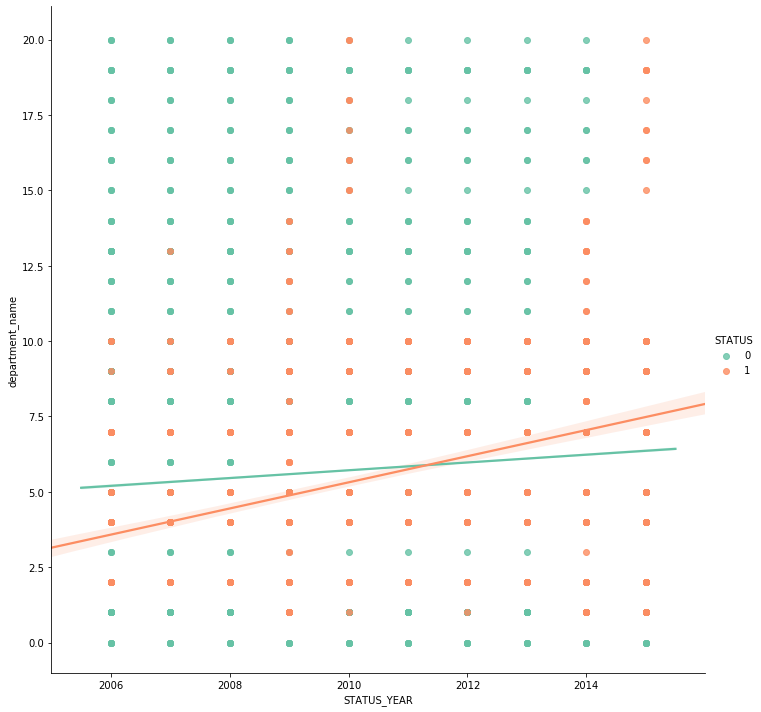

In [244]:
import seaborn as sns

sns.lmplot(x='STATUS_YEAR', y='department_name', data=df, fit_reg=True, hue='STATUS', palette="Set2", height=10)

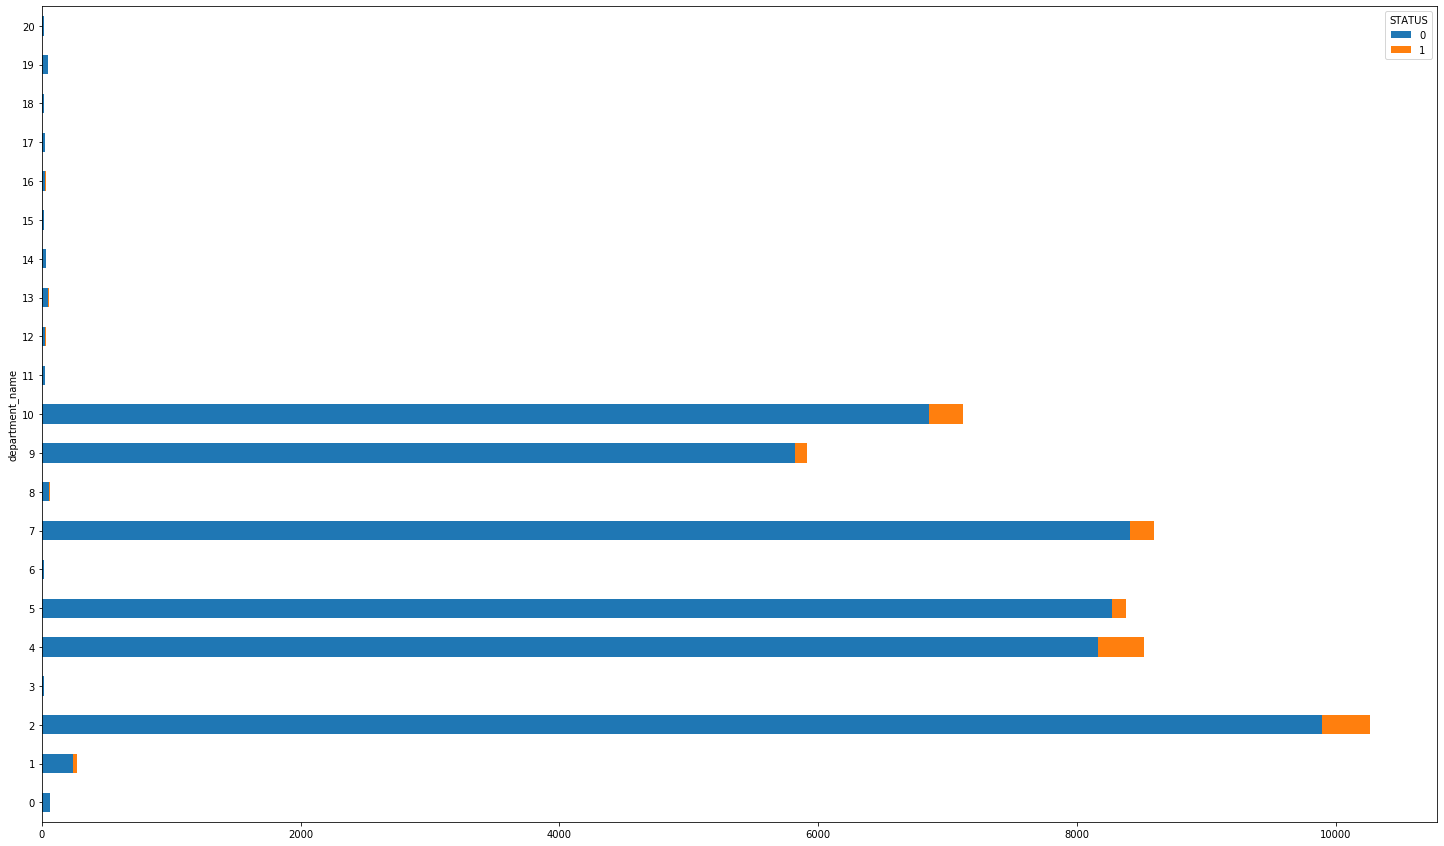

In [243]:
tbl_tempo_demissao = pd.crosstab(index=df['department_name'], columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

#É possível notar que a concentração de demissões está em 6 dos departamentos. 

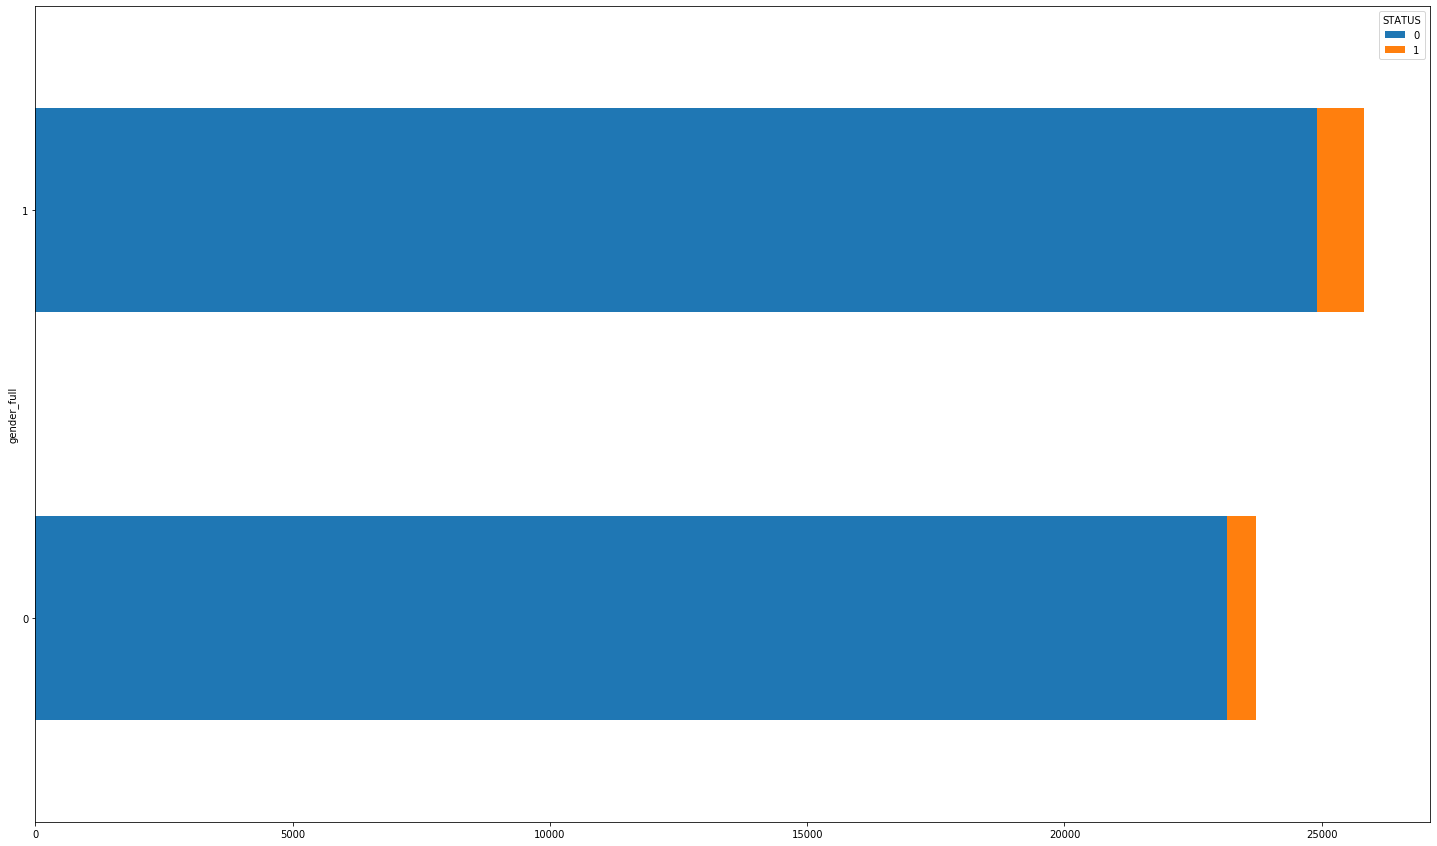

In [246]:
tbl_tempo_demissao = pd.crosstab(index=df['gender_full'], columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

#Houve um maior desligamento de pessoas do sexo feminino (1) durante toda a

In [247]:
df['STATUS'].value_counts()

0    48063
1     1475
Name: STATUS, dtype: int64

In [248]:
df['gender_full'].value_counts()

1    25823
0    23715
Name: gender_full, dtype: int64

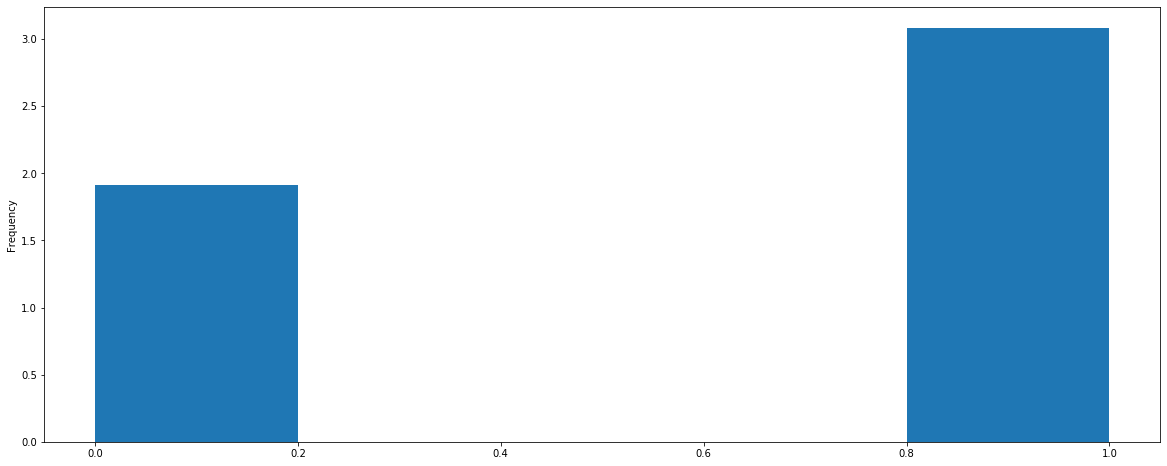

In [250]:
df.loc[(df['STATUS'] == 1), 'gender_full'].plot(kind='hist', density=1, bins=5, stacked=False,alpha=1,figsize=(20,8))

#há um numero consideravelmente maior de demissões de funcionários do sexo feminino.

In [254]:
df['job_title'] = pd.factorize(df['job_title'])[0]
df['city_name'] = pd.factorize(df['city_name'])[0]
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52.0,17.0,0,0,0,35.0,M,0,Not Applicable,0,2006.0,0,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53.0,18.0,0,0,0,35.0,M,0,Not Applicable,0,2007.0,0,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54.0,19.0,0,0,0,35.0,M,0,Not Applicable,0,2008.0,0,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55.0,20.0,0,0,0,35.0,M,0,Not Applicable,0,2009.0,0,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56.0,21.0,0,0,0,35.0,M,0,Not Applicable,0,2010.0,0,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21.0,2.0,34,7,12,34.0,M,0,Layoff,2,2015.0,1,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19.0,0.0,0,10,31,44.0,F,1,Resignaton,1,2013.0,1,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21.0,2.0,30,10,31,39.0,F,1,Layoff,2,2015.0,1,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19.0,0.0,4,10,31,16.0,F,1,Resignaton,1,2013.0,1,STORES


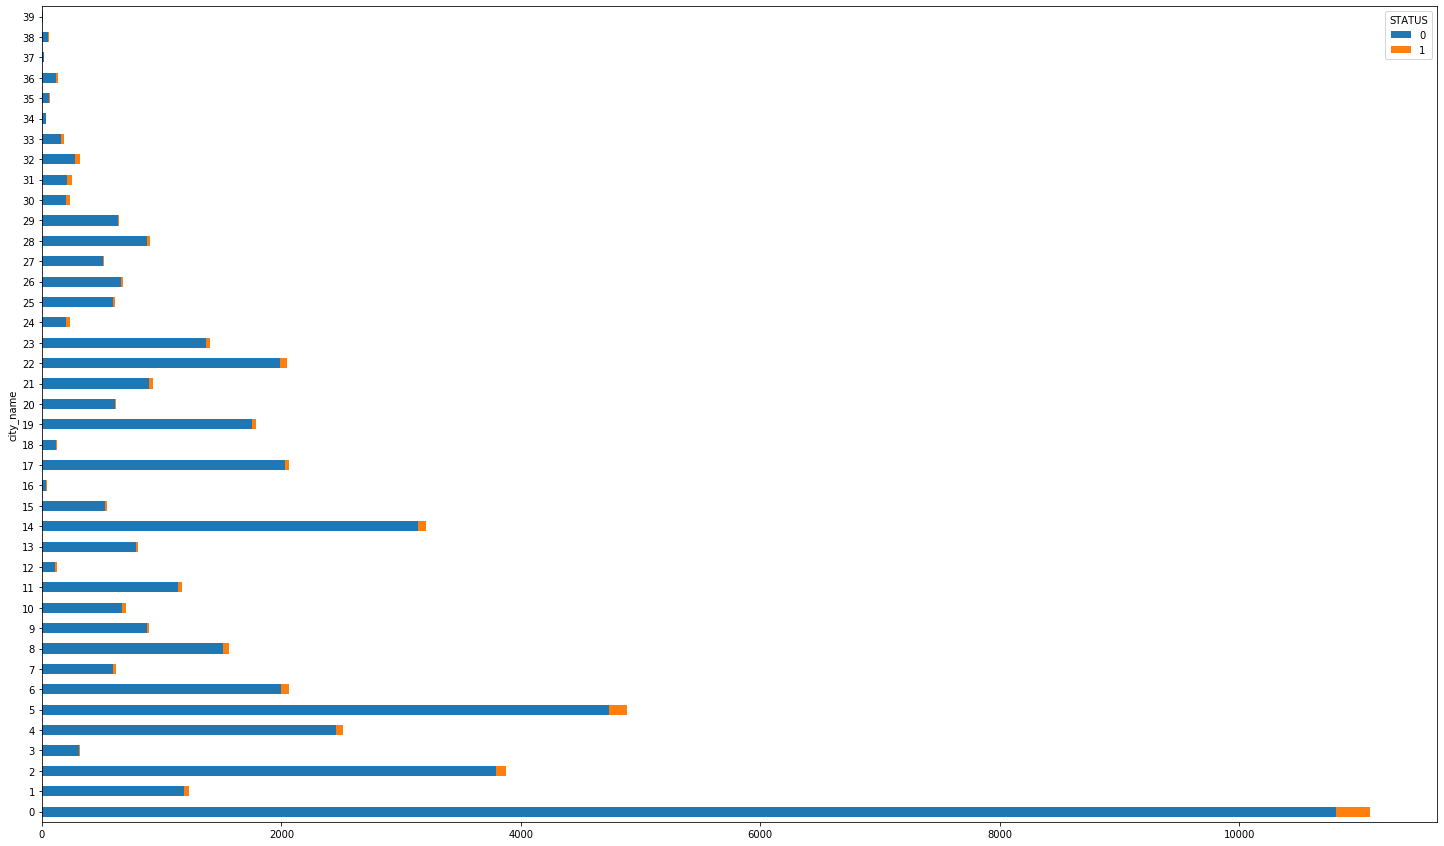

In [255]:
#CIDADE VS DEMISSAO

tbl_tempo_demissao = pd.crosstab(index=df['city_name'], columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

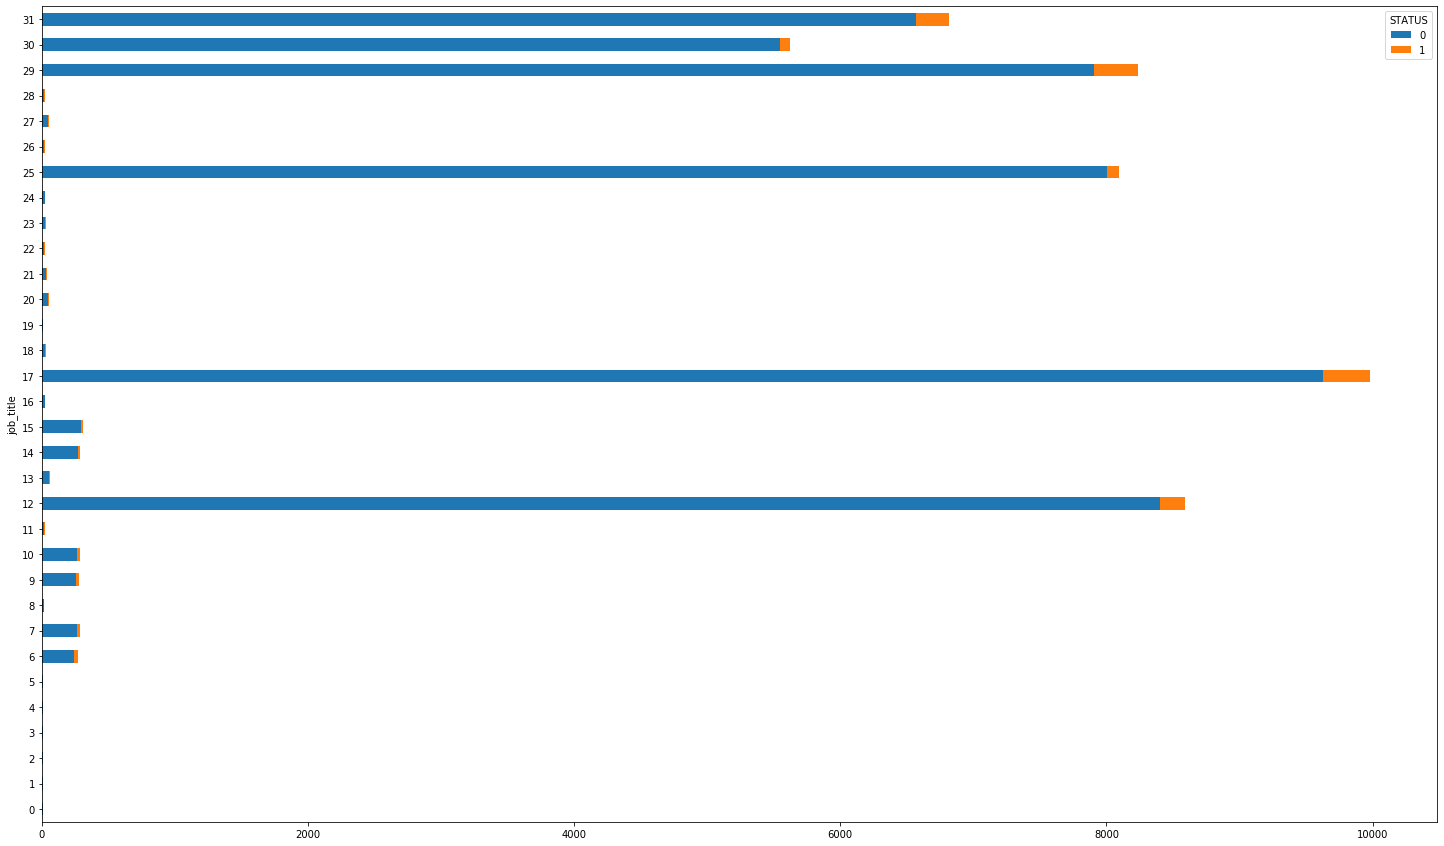

In [256]:
#CARGO VS DEMISSAO

tbl_tempo_demissao = pd.crosstab(index=df['job_title'], columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

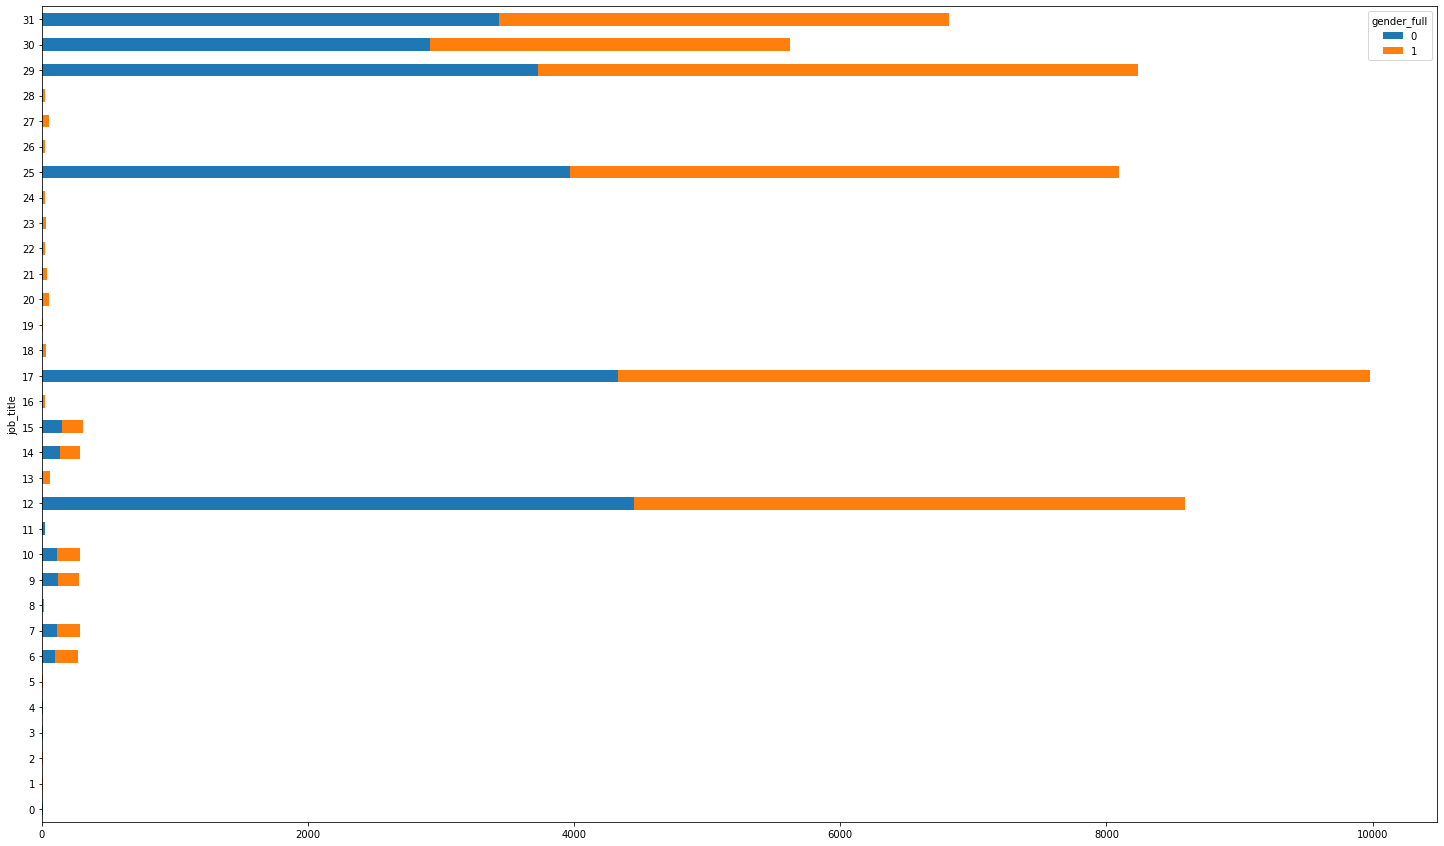

In [257]:
tbl_tempo_demissao = pd.crosstab(index=df['job_title'], columns=df['gender_full'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

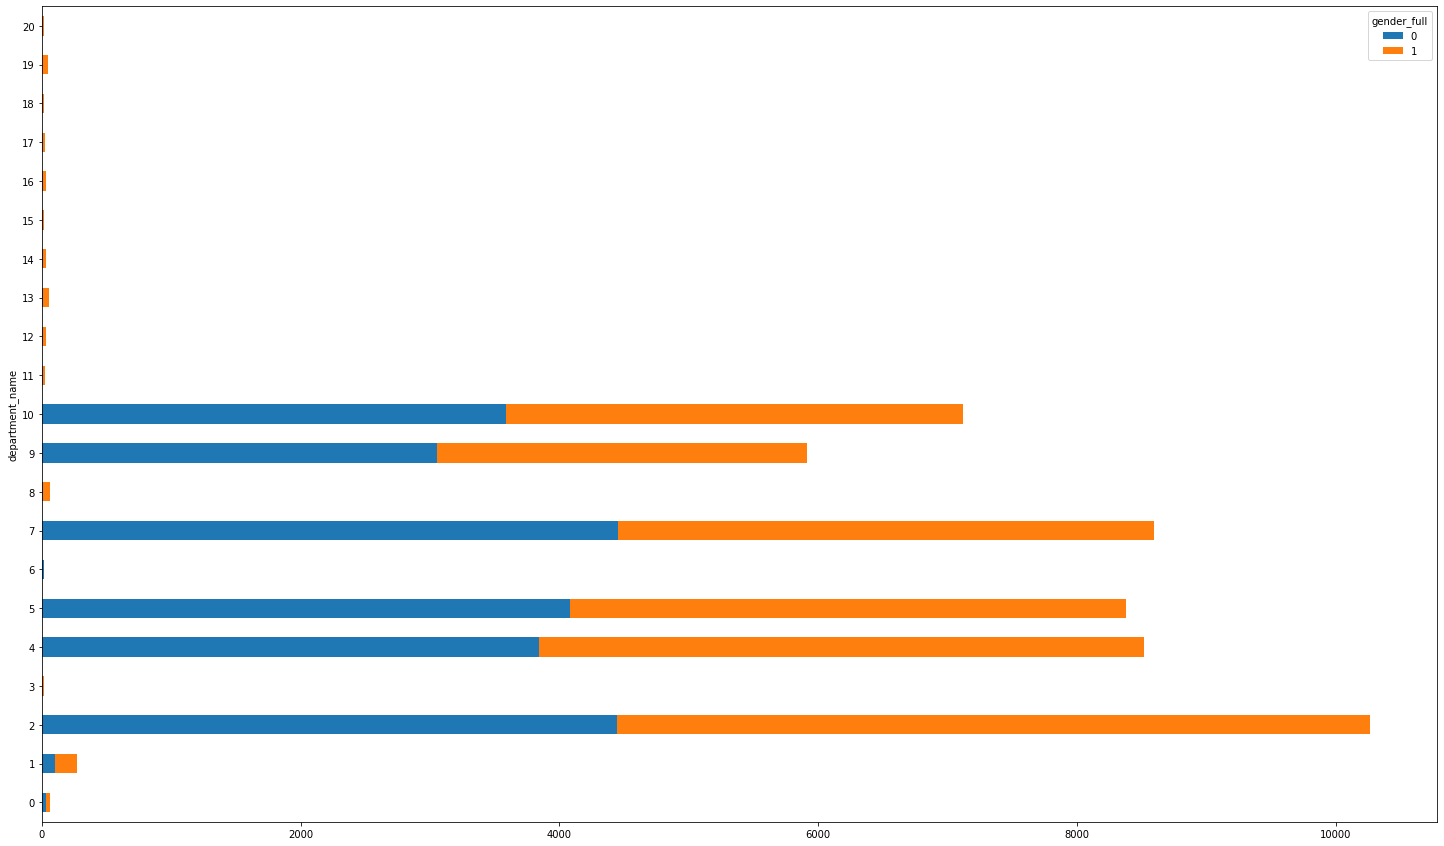

In [259]:
tbl_tempo_demissao = pd.crosstab(index=df['department_name'], columns=df['gender_full'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

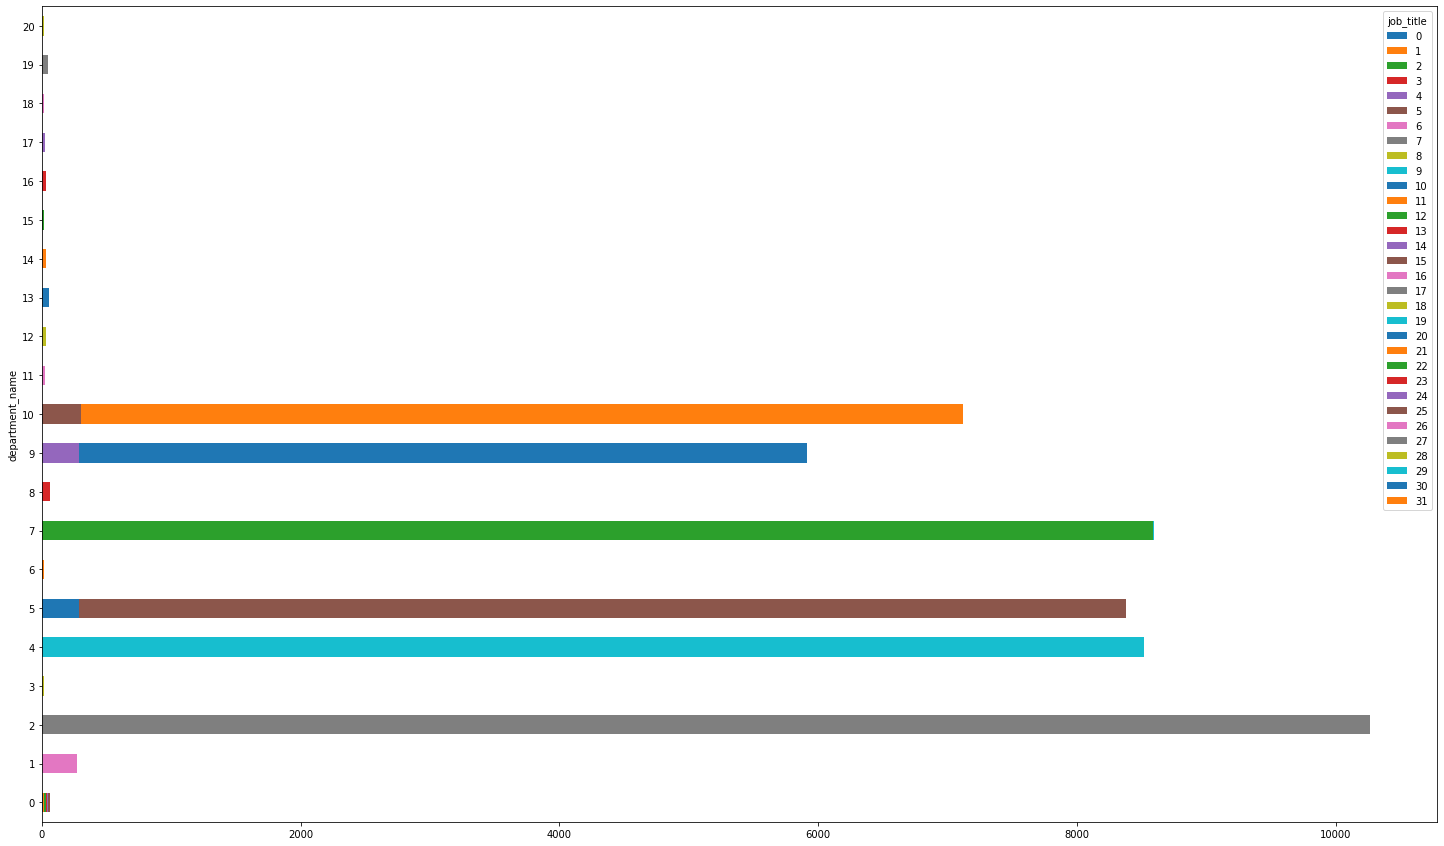

In [260]:
#Separação dos Cargos por Departamento

tbl_tempo_demissao = pd.crosstab(index=df['department_name'], columns=df['job_title'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

In [262]:
df['age'].mean()

42.04552061044047

In [265]:
df['age'].median()

42.0

In [266]:
df['age'].mode()

0    27.0
dtype: float64

In [ ]:


tbl_tempo_demissao = pd.crosstab(index=df['BUSINESS UNIT'], columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

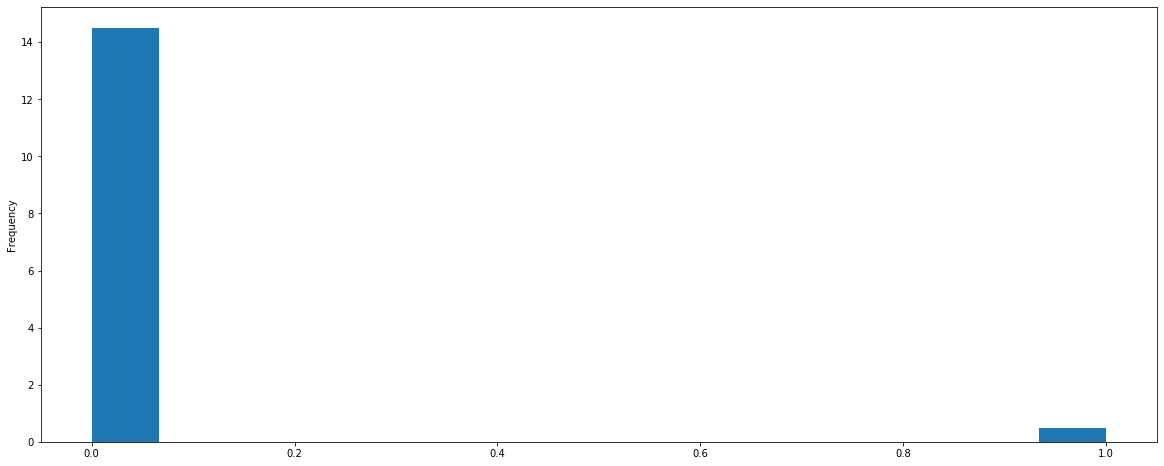

In [286]:
df.loc[(df['STATUS_YEAR'] == 2015), 'STATUS'].plot(kind='hist', density=1, bins=15, stacked=False,alpha=1,figsize=(20,8))

In [280]:
#NUMERO DE FUNCIONARIOS REGISTRADOS A CADA ANO

(df['STATUS_YEAR'] == 2015).value_counts()

#FUNCIONARIOS POR ANO

#2006 - 4564 funcionarios
#2007 - 4668 funcionários
#2008 - 4752 funcionarios
#2009 - 4837 funcionarios
#2010 - 4953 funcionarios
#2011 - 5072 funcionarios
#2012 - 5221 funcionarios
#2013 - 5310 funcionarios
#2014 - 5205 funcionarios
#2015 - 4956 funcionarios

#De 2006 até 2013 houve a cada ano um pequeno crescimento no numero de funcionarios, o que mostra uma evolução na Rede.
#Após 2013 o número começou a cair, mostrando um número maior de demissões do que de contratações, indicando um possível corte de gastos.


False    44582
True      4956
Name: STATUS_YEAR, dtype: int64

In [359]:
df['termreason_desc'].replace(['NotApplicable', 'Retirement', 'Resignaton', 'Layoff'], [0, 1, 2, 3], inplace = True)

In [380]:

((df['STATUS_YEAR'] == 2014) & (df['STATUS'] == 1) & (df['termreason_desc'] == 3)).value_counts()


#2011 aumentou o número de desligamentos por renuncia de cargo


False    49396
True       142
dtype: int64

In [356]:
((df['STATUS_YEAR'] == 2015) & (df['STATUS'] == 1)).value_counts() #troca o parâmetro do ano

#FUNCIONARIOS DESLIGADOS POR ANO

#2006 - 134 funcionarios
#2007 - 162 funcionários
#2008 - 164 funcionarios
#2009 - 137 funcionarios
#2010 - 123 funcionarios
#2011 - 110 funcionarios
#2012 - 130 funcionarios
#2013 - 105 funcionarios
#2014 - 248 funcionarios
#2015 - 162 funcionarios

#Como é possível ver, confirmando o item anterior, após 2013, mais precisamente em 2014, houve um número bem acima da média de demissoes
#podendo confirmar algum tipo de corte de gastos/insatisfação por parte dos funcionários

False    49376
True       162
dtype: int64

In [341]:
((df['STATUS_YEAR'] == 2014) & (df['STATUS'] == 1) & (df['STATUS'] == 1) & (df['termtype_desc'] == 2)).value_counts()

#142 demissoes voluntarias em 2014
#Confirmando mais uma vez, só a partir de 2014 que começaram a ser demitidas pessoas de forma involuntária, ou seja, 
#contra a vontade do funcionário. Antes disso, não houve nenhuma demissão desse tipo.

False    49396
True       142
dtype: int64

In [342]:
df['termtype_desc'].value_counts()

0    48063
1     1260
2      215
Name: termtype_desc, dtype: int64

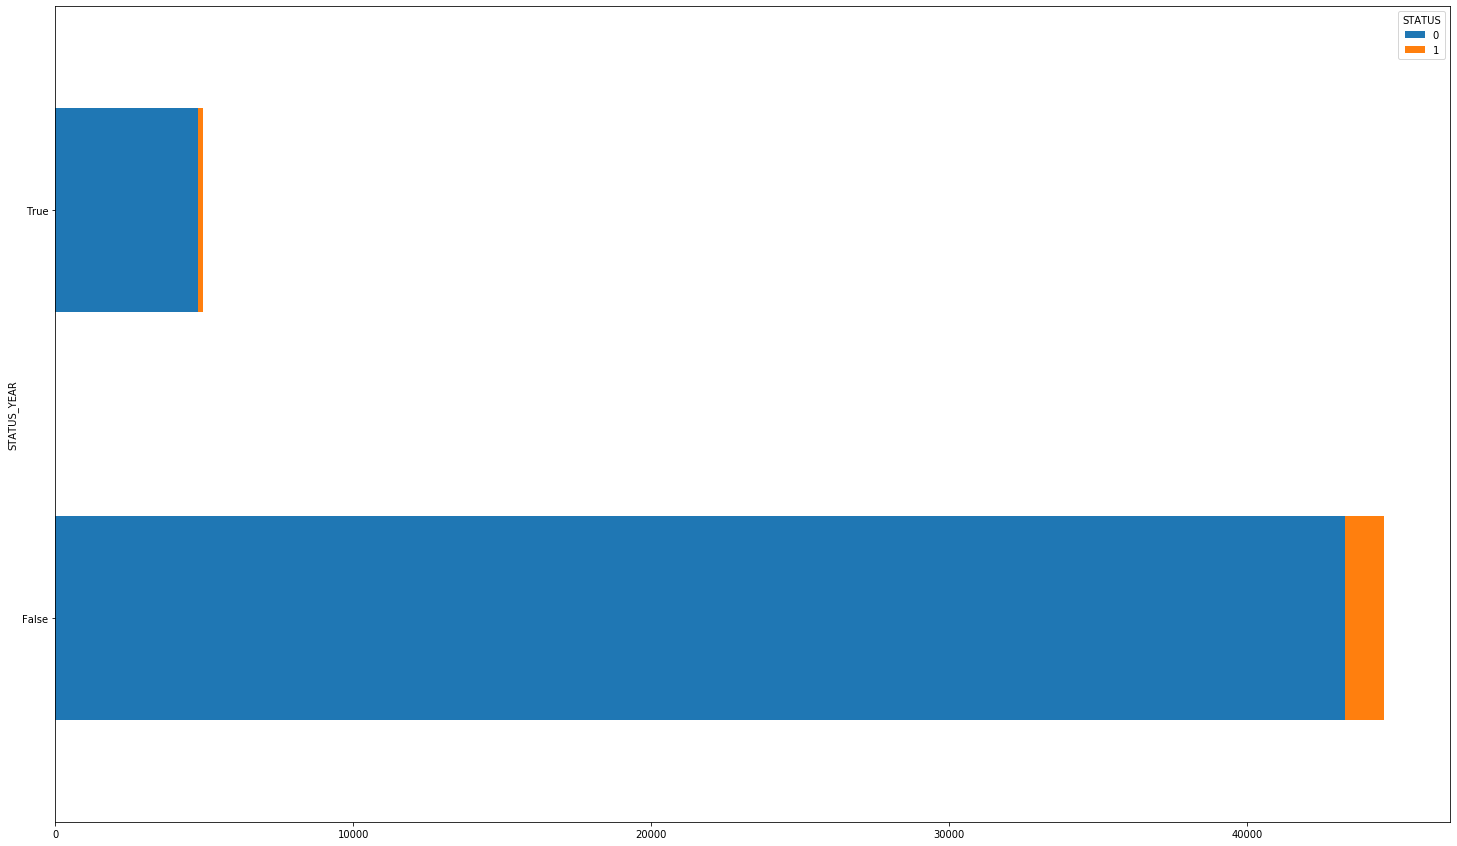

In [292]:
tbl_tempo_demissao = pd.crosstab(index=df['STATUS_YEAR'] == 2015, columns=df['STATUS'])
tbl_tempo_demissao.plot(kind="barh",figsize=(25,15), stacked=True)

In [ ]:
#Inicialmente tinha mais mulheres do que homens. Porém a partir de 2013, o número de homens e mulheres foi igualando,sendo bem semelhante em 2015
#Diminuição cada vez maior de cortadores de carne, talvez por problemas de consumo ou mercado de 2006 até 2015.
#Diminuição nos funcionários de produção de 2006 até 2015.
#As pessoas mais velhas estão concentradas nos setores de escritório, são mais experientes.

In [387]:
((df['length_of_service'] == 0) & (df['STATUS_YEAR'] == 2007)).value_counts()

#só demissao em 2014

False    49298
True       240
dtype: int64

In [384]:
((df['STATUS_YEAR'] == 2014) & (df['STATUS'] == 1)).value_counts()

False    49290
True       248
dtype: int64

In [ ]:
#TURNOVER

#2006 - 1,1613%
#2007 - 

#2014 - 